In [1]:
from qiskit import QuantumCircuit, Aer, transpile, assemble
from qiskit.visualization import plot_histogram
from qiskit.providers.fake_provider import FakeArmonk
from qiskit import pulse

# Choose a backend for the pulse simulation
backend = FakeArmonk()

# Define the pulse schedule
schedule = pulse.Schedule()

# Define qubits and pulses
qubit_0 = 0
qubit_1 = 1

# Define pulse parameters
duration = 20  # duration of the pulse in time units
amp = 0.5      # amplitude of the pulse

# Create a Hadamard-like pulse for qubit 0
pulse_0 = pulse.Gaussian(duration, amp, duration/2)  # Gaussian pulse example
schedule += pulse.Play(pulse_0, pulse.drive_channel(qubit_0))

# Create a CNOT pulse from qubit 0 to qubit 1
pulse_cnot = pulse.Gaussian(duration, amp, duration/2)  # Gaussian pulse for CNOT example
schedule += pulse.Play(pulse_cnot, pulse.control_channel(qubit_0, qubit_1))

# Run the pulse schedule on a simulator
simulator = Aer.get_backend('pulse_simulator')
job = simulator.run(schedule)
result = job.result()

# Optionally, visualize the results
print(result)

ImportError: cannot import name 'Aer' from 'qiskit' (C:\Users\mcniv\anaconda3\envs\pulse_3p11\Lib\site-packages\qiskit\__init__.py)

In [5]:
from qiskit import pulse
from qiskit.pulse.library import Gaussian
from qiskit_ibm_runtime.fake_provider import FakeValenciaV2
 
backend = FakeValenciaV2()

In [10]:
from qiskit import QuantumCircuit, transpile, assemble
from qiskit_ibm_runtime.fake_provider import FakeValenciaV2
from qiskit import pulse
#from qiskit.providers.aer import Aer
from qiskit.visualization import plot_histogram

# Choose a backend for the pulse simulation
backend = FakeValenciaV2()

# Create a pulse schedule for the Bell state
schedule = pulse.Schedule()

# Define qubits and pulses
qubit_0 = 0
qubit_1 = 1

# Define pulse parameters
duration = 20  # duration of the pulse in time units
amp = 0.5      # amplitude of the pulse

# Create a Hadamard-like pulse for qubit 0
pulse_0 = pulse.Gaussian(duration, amp, duration/2)  # Gaussian pulse example
schedule += pulse.Play(pulse_0, pulse.drive_channel(qubit_0))

# Create a CNOT pulse from qubit 0 to qubit 1
pulse_cnot = pulse.Gaussian(duration, amp, duration/2)  # Gaussian pulse for CNOT example
schedule += pulse.Play(pulse_cnot, pulse.control_channel(qubit_0, qubit_1))

# Run the pulse schedule on the simulator
simulator = Aer.get_backend('pulse_simulator')
job = simulator.run(schedule)
result = job.result()

# Print the result
print(result)

NoActiveBuilder: 'A Pulse builder function was called outside of a builder context. Try calling within a builder context, eg., "with pulse.build() as schedule: ...".'

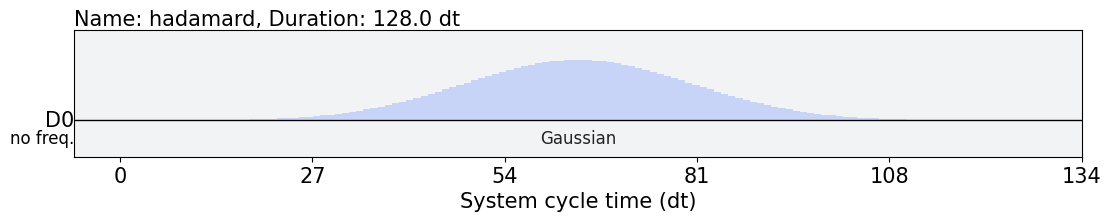

In [26]:
from qiskit import QuantumCircuit, transpile, assemble
from qiskit_ibm_runtime.fake_provider import FakeValenciaV2
from qiskit import pulse
#from qiskit.providers.aer import Aer
from qiskit.visualization import plot_histogram

# Choose a backend for the pulse simulation
backend = FakeValenciaV2()

# Create a pulse schedule for the Bell state
schedule = pulse.Schedule()

# Define qubits and pulses
qubit_0 = 0
qubit_1 = 1

# Define pulse parameters
duration = 20  # duration of the pulse in time units
amp = 0.5      # amplitude of the pulse

#Hadamard pulse for q0
#play --> play(pulse,channel) which applies a pulse on the given channel
#build --> 
with pulse.build(backend, name='hadamard') as h_q0:
    pulse.play(Gaussian(duration=128, amp=0.1, sigma=16), pulse.drive_channel(0))
h_q0.draw()

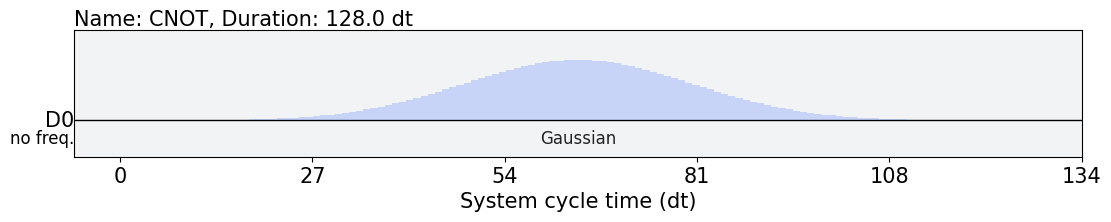

In [33]:
with pulse.build(backend, name='CNOT') as CNOT_q0:
    pulse.play(Gaussian(duration=128, amp=0.1, sigma=16), pulse.drive_channel(0))
    #pulse.play(Gaussian(duration=128, amp=0.51, sigma=16), pulse.control_channel(1))
CNOT_q0.draw()

In [ ]:
-----------------------------------

In [ ]:
from qiskit import QuantumCircuit, transpile, assemble
from qiskit.providers.fake_provider import FakeArmonk
from qiskit import pulse
from qiskit.providers.aer import Aer
from qiskit.visualization import plot_histogram

# Choose a backend for the pulse simulation
backend = FakeArmonk()

# Create a pulse schedule for the Bell state
schedule = pulse.Schedule()

# Define qubits and pulses
qubit_0 = 0
qubit_1 = 1

# Define pulse parameters
duration = 20  # duration of the pulse in time units
amp = 0.5      # amplitude of the pulse

# Create a Hadamard-like pulse for qubit 0
pulse_0 = pulse.Gaussian(duration, amp, duration/2)  # Gaussian pulse example
schedule += pulse.Play(pulse_0, pulse.drive_channel(qubit_0))

# Create a CNOT pulse from qubit 0 to qubit 1
pulse_cnot = pulse.Gaussian(duration, amp, duration/2)  # Gaussian pulse for CNOT example
schedule += pulse.Play(pulse_cnot, pulse.control_channel(qubit_0, qubit_1))

# Run the pulse schedule on the simulator
simulator = Aer.get_backend('pulse_simulator')
job = simulator.run(schedule)
result = job.result()

# Print the result
print(result)

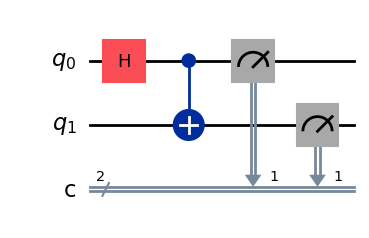

In [74]:
from qiskit.pulse.library import Gaussian
from qiskit import schedule
duration=128
amp=0.2
sigma=16
gaussian_pulse=Gaussian(duration,amp,sigma)
qc=QuantumCircuit(2,2)
qc.h(0)
qc.cx(0,1)
qc.measure([0,1],[1,1])
qc.draw('mpl')

In [75]:
qc=transpile(qc,backend)
print(backend)
qc.draw()
#pulse_schedule.draw()
#pulse.Schedule()

global phase: π/4
               ┌─────────┐┌────┐┌─────────┐     ┌─┐   
      q_0 -> 0 ┤ Rz(π/2) ├┤ √X ├┤ Rz(π/2) ├──■──┤M├───
               └─────────┘└────┘└─────────┘┌─┴─┐└╥┘┌─┐
      q_1 -> 1 ────────────────────────────┤ X ├─╫─┤M├
                                           └───┘ ║ └╥┘
ancilla_0 -> 2 ──────────────────────────────────╫──╫─
                                                 ║  ║ 
ancilla_1 -> 3 ──────────────────────────────────╫──╫─
                                                 ║  ║ 
ancilla_2 -> 4 ──────────────────────────────────╫──╫─
                                                 ║  ║ 
          c: 2/══════════════════════════════════╩══╩═
                                                 1  1

In [79]:
scheduled=schedule(qc,backend)

Schedule((0, ShiftPhase(-1.5707963268, DriveChannel(0))), (0, ShiftPhase(-1.5707963268, ControlChannel(1))), (0, Play(Drag(duration=160, sigma=40, beta=-0.35835396095069005, amp=0.09619222815230141, angle=0.008783280252964184, name='drag_f8d4'), DriveChannel(0), name='drag_f8d4')), (160, ShiftPhase(-1.5707963268, DriveChannel(0))), (160, ShiftPhase(1.5707963267948966, DriveChannel(0))), (160, ShiftPhase(-1.5707963268, ControlChannel(1))), (160, ShiftPhase(1.5707963267948966, ControlChannel(1))), (160, Play(Drag(duration=160, sigma=40, beta=-0.25388969010654494, amp=0.19290084722113582, angle=-1.5707963267948968, name='drag_169f'), DriveChannel(0), name='drag_169f')), (160, Play(Drag(duration=160, sigma=40, beta=-0.5196057292826135, amp=0.0746414463895804, angle=0.007898523847627245, name='drag_f352'), DriveChannel(1), name='drag_f352')), (320, Play(GaussianSquare(duration=432, sigma=64, width=176, amp=0.06740617502322209, angle=0.023765720478682046, name='gaussian_square_9e78'), DriveC

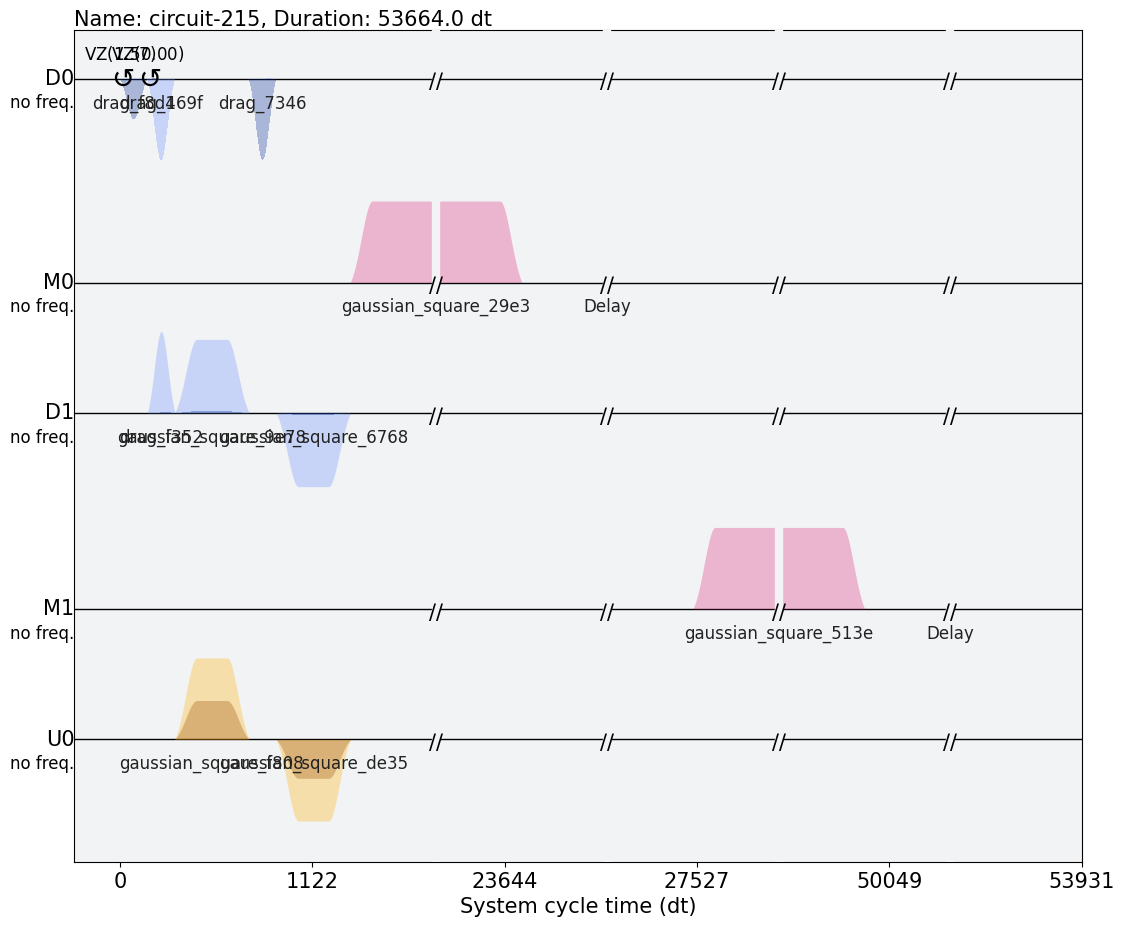

In [89]:
schedule(qc,backend).draw()